<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Graph-Analysis" data-toc-modified-id="Graph-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graph Analysis</a></span></li></ul></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#GeoSpatial-Analysis" data-toc-modified-id="GeoSpatial-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>GeoSpatial Analysis</a></span></li><li><span><a href="#Por-estaciones" data-toc-modified-id="Por-estaciones-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Por estaciones</a></span></li></ul></li></ul></div>

# Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import folium 
import networkx as nx
import numpy as np
from IPython.display import display, Latex


sns.set(rc={'figure.figsize':(20,10), 'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'})
sns.set_theme()

In [2]:
data2019 = pd.read_excel("data/2019.xlsx", sheet_name = [0,3])
data2020 = pd.read_excel("data/2020.xlsx")
data2021 = pd.read_excel("data/2021.xlsx")
data2021_completa = pd.read_excel("data/2021_completa.xlsx", sheet_name = [0,3])
data2022 = pd.read_excel("data/2022.xlsx", sheet_name = [0,3])

In [3]:
data2019 = data2019[0].append(data2019[3])
data2021_completa = data2021_completa[0].append(data2021_completa[3])
data2022 = data2022[0].append(data2022[3])

In [4]:
data2019.index = pd.to_datetime(data2019['DATE_TIME'])
data2020.index = pd.to_datetime(data2020['DATE_TIME'])
data2021.index = pd.to_datetime(data2021['DATE_TIME'], errors='coerce')
data2021_completa.index = pd.to_datetime(data2021_completa['DATE_TIME'], errors='coerce')
data2022.index = pd.to_datetime(data2022['DATE_TIME'], errors='coerce')

In [30]:
data2021.dropna(subset=['DATE_TIME'], inplace=True)

In [8]:
data2019[data2019.STATION == "01 Bayamón"]

,DATE_TIME,STATION,OPERATIVE_DATE,ENTRIES,EXITS,Year-Month,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
DATE_TIME,,,,,,,,,,,,,,
2019-01-01 05:00:00,2019-01-01 05:00:00,01 Bayamón,2019-01-01,13.0,0.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
2019-01-01 06:00:00,2019-01-01 06:00:00,01 Bayamón,2019-01-01,11.0,3.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
2019-01-01 07:00:00,2019-01-01 07:00:00,01 Bayamón,2019-01-01,7.0,7.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
2019-01-01 08:00:00,2019-01-01 08:00:00,01 Bayamón,2019-01-01,5.0,4.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
2019-01-01 09:00:00,2019-01-01 09:00:00,01 Bayamón,2019-01-01,9.0,9.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 17:00:00,2019-12-31 17:00:00,01 Bayamón,2019-12-31,22.0,33.0,2019-12,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
2019-12-31 18:00:00,2019-12-31 18:00:00,01 Bayamón,2019-12-31,13.0,23.0,2019-12,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
2019-12-31 19:00:00,2019-12-31 19:00:00,01 Bayamón,2019-12-31,11.0,17.0,2019-12,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN


In [73]:
data2019[data2019.STATION == "02 Deportivo"]

,DATE_TIME,STATION,OPERATIVE_DATE,ENTRIES,EXITS,Year-Month,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3504,2019-01-01 05:00:00,02 Deportivo,2019-01-01,7.0,2.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
3505,2019-01-01 06:00:00,02 Deportivo,2019-01-01,1.0,7.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
3506,2019-01-01 07:00:00,02 Deportivo,2019-01-01,8.0,5.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
3507,2019-01-01 08:00:00,02 Deportivo,2019-01-01,6.0,8.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
3508,2019-01-01 09:00:00,02 Deportivo,2019-01-01,11.0,2.0,2019-01,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,2019-12-31 17:00:00,02 Deportivo,2019-12-31,22.0,23.0,2019-12,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
7034,2019-12-31 18:00:00,02 Deportivo,2019-12-31,18.0,12.0,2019-12,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
7035,2019-12-31 19:00:00,02 Deportivo,2019-12-31,13.0,15.0,2019-12,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
7036,2019-12-31 20:00:00,02 Deportivo,2019-12-31,4.0,9.0,2019-12,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN


In [9]:
data2021_entries = data2021.groupby('STATION').resample('W').sum()[['ENTRIES']]

In [10]:
data2021_entries.reset_index(inplace=True)

# Rename the 'DATETIME' column to 'WEEK' since it represents the week's start date
data2021_entries.rename(columns={'DATETIME': 'WEEK'}, inplace=True)

In [14]:
data2021_entries.head()

,STATION,DATE_TIME,ENTRIES
0,01 Bayamón,2021-01-03,232
1,01 Bayamón,2021-01-10,1334
2,01 Bayamón,2021-01-17,1914
3,01 Bayamón,2021-01-24,1864
4,01 Bayamón,2021-01-31,2132


In [19]:
data2021_entries_mean = data2021_entries.groupby("STATION").mean()[["ENTRIES"]]
data2021_entries_mean.head(16)

,ENTRIES
STATION,
01 Bayamón,2338.806452
02 Deportivo,2132.290323
03 Jardines,645.935484
04 Torrimar,699.129032
05 Martínez Nadal,1381.483871
06 Las Lomas,969.935484
07 San Francisco,1415.064516
08 Centro Médico,1771.645161
09 Cupey,1066.451613


In [26]:
weights_2021 = list(data2021_entries_mean.ENTRIES / data2021_entries_mean.ENTRIES.sum())

In [16]:
data2019_entries = data2019.groupby('STATION').resample('W').sum()[['ENTRIES']]

In [17]:
data2019_entries.reset_index(inplace=True)

# Rename the 'DATETIME' column to 'WEEK' since it represents the week's start date
data2019_entries.rename(columns={'DATETIME': 'WEEK'}, inplace=True)

In [20]:
data2019_entries.head()

,STATION,DATE_TIME,ENTRIES
0,01 Bayamón,2019-01-06,5086.0
1,01 Bayamón,2019-01-13,10096.0
2,01 Bayamón,2019-01-20,18192.0
3,01 Bayamón,2019-01-27,13243.0
4,01 Bayamón,2019-02-03,15933.0


In [21]:
data2019_entries_mean = data2019_entries.groupby("STATION").mean()[["ENTRIES"]]

In [22]:
data2019_entries_mean.head(16)
# estaciones por mes y entradas 

,ENTRIES
STATION,
01 Bayamón,12524.905660
02 Deportivo,10076.320755
03 Jardines,1720.339623
04 Torrimar,2065.452830
05 Martínez Nadal,6364.000000
06 Las Lomas,2714.264151
07 San Francisco,4215.584906
08 Centro Médico,7223.566038
09 Cupey,5303.811321


In [28]:
weights_2019 = list(data2019_entries_mean.ENTRIES / data2019_entries_mean.ENTRIES.sum())

In [15]:
data2019_entries_mean.reset_index(inplace=True)

## Graph Analysis 

In [76]:
G = nx.DiGraph()

In [31]:
def tren_urbano_layout():
    pos = {
        "01 Bayamón": (0, 3),
        "02 Deportivo": (1, 3),
        "03 Jardines": (2, 3),
        "04 Torrimar": (3, 3),
        "05 Martínez Nadal": (4, 3),
        "06 Las Lomas": (5, 3),
        "07 San Francisco": (6, 3),
        "08 Centro Médico": (7, 3),
        "09 Cupey": (8, 3),
        "10 Rio Piedras": (8, 4),
        "11 Universidad": (8, 5),
        "12 Piñero": (7, 5),
        "13 Domenech": (6, 5),
        "14 Roosevelt": (5, 5),
        "15 Hato Rey": (4, 5),
        "16 Sagrado Corazón": (3, 5),
    }
    return pos

In [77]:
nodes = data2019.STATION.dropna().unique()

In [87]:
edges = [(nodes[i], nodes[i + 1], round(weights_2019[i] * 100)) for i in range(len(nodes) - 1)]

In [88]:
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

In [54]:
colors = np.linspace(4, 3, len(G.nodes))

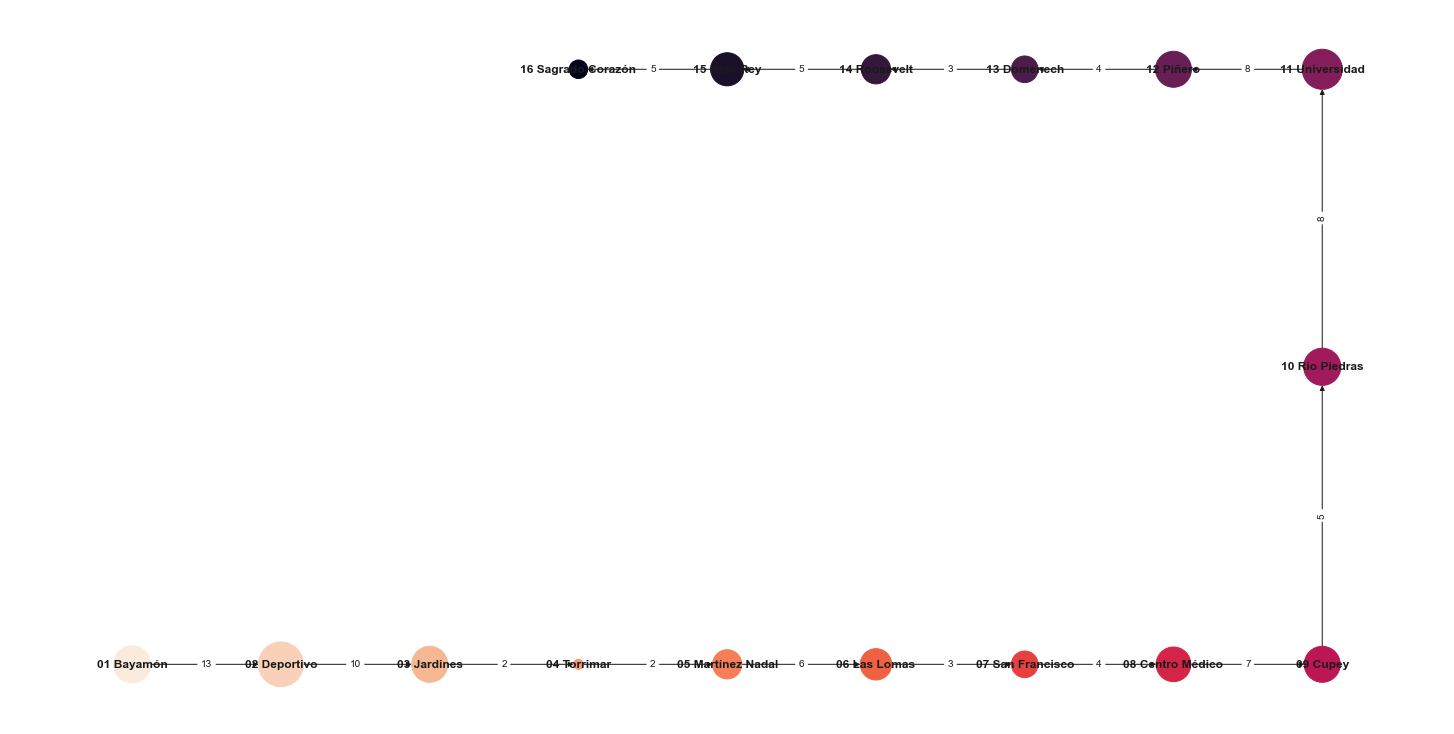

In [89]:
# Draw the graph using the custom linear layout and the station order
# Calculate the total weight of the edges connected to each node
node_weights = get_node_weights(G)

# Normalize the weights to create a suitable scale for node sizes
normalized_weights = normalize_weights(node_weights)

# Draw the graph using the custom linear layout and the station order
pos = tren_urbano_layout()
nx.draw(G, pos=pos, node_size=list(normalized_weights.values()), with_labels=True, font_weight='bold', arrows=True, node_color=colors)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

plt.show()

In [108]:
edges = [(nodes[i], nodes[i + 1], round(weights_2021[i] * 100)) for i in range(len(nodes) - 1)]
edges1 = [(nodes[i + 1 ], nodes[i ], round(weights_2021[i] * 100)) for i in range(len(nodes)-1)]

In [109]:
edges = edges + edges1

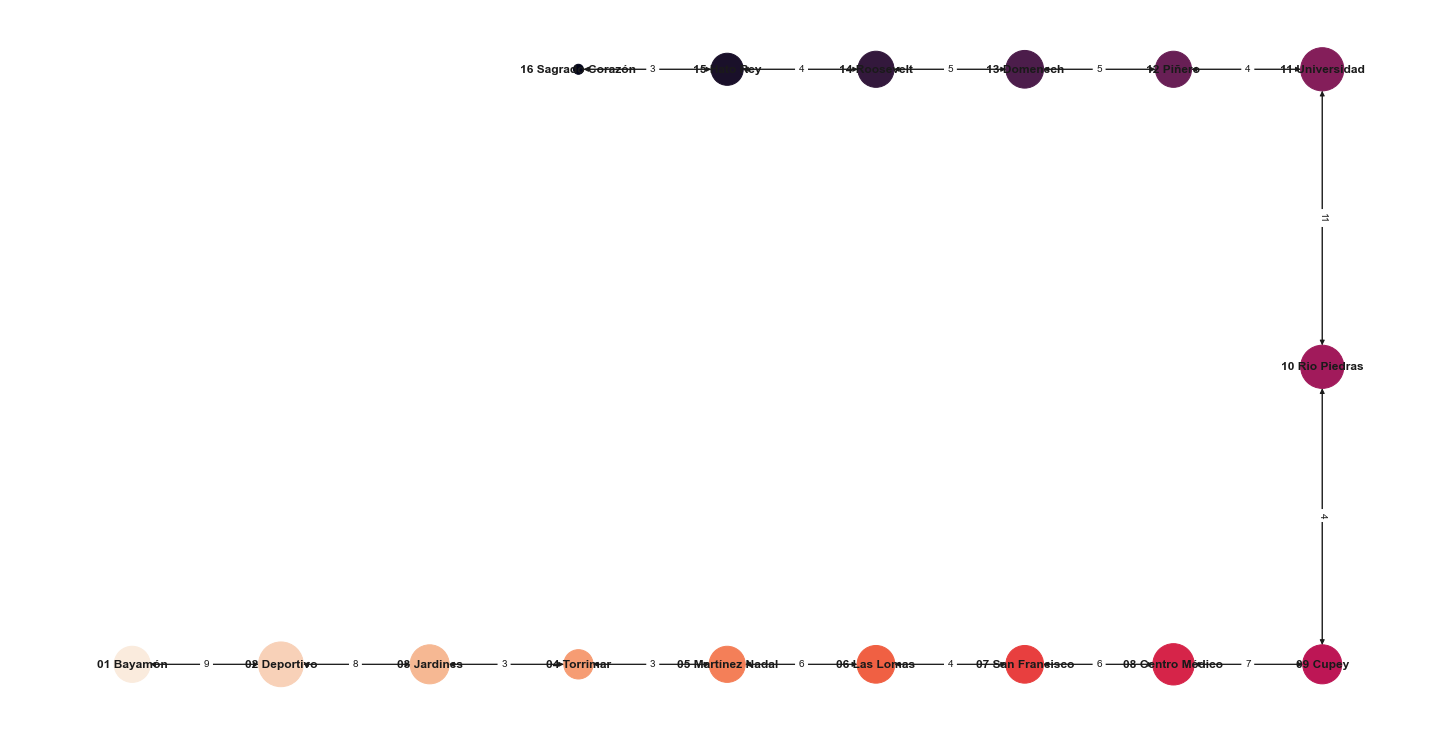

In [110]:
def get_node_weights(G, attr="weight"):
    node_weights = {}
    for u, v, data in G.edges(data=True):
        weight = data.get(attr, 1)
        node_weights[u] = node_weights.get(u, 0) + weight
        node_weights[v] = node_weights.get(v, 0) + weight
    return node_weights

import math

def normalize_weights(weights, min_size=100, max_size=2000, eps=1e-9):
    min_weight = min(weights.values())
    max_weight = max(weights.values())


    if min_weight == max_weight:
        return {node: max_size for node in weights}

    log_min_weight = math.log(min_weight + eps)
    log_max_weight = math.log(max_weight + eps)

    normalized_weights = {
        node: min_size + (max_size - min_size) * (math.log(weight + eps) - log_min_weight) / (log_max_weight - log_min_weight)
        for node, weight in weights.items()
    }
    return normalized_weights

G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# Calculate the total weight of the edges connected to each node
node_weights = get_node_weights(G)

# Normalize the weights to create a suitable scale for node sizes
normalized_weights = normalize_weights(node_weights)

# Draw the graph using the custom linear layout and the station order
pos = tren_urbano_layout()
nx.draw(G, pos=pos, node_size=list(normalized_weights.values()), with_labels=True, font_weight='bold', arrows=True, node_color=colors)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

plt.show()

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load and preprocess the datasets

data2019['Year'] = 2019
data2021['Year'] = 2021
data2020['Year'] = 2020
data2021_completa['Year'] = 2021
data2022['Year'] = 2022

def total_entries_exits(data):
    station_totals = data.groupby('STATION').agg({'ENTRIES': 'sum', 'EXITS': 'sum'}).reset_index()
    station_totals['TOTAL'] = station_totals['ENTRIES'] + station_totals['EXITS']
    return station_totals.set_index('STATION')['TOTAL']

totals_2019 = total_entries_exits(data2019)
totals_2021 = total_entries_exits(data2021)

# Calculate the difference in entries and exits between 2019 and 2021
difference = (totals_2021 - totals_2019).dropna()

# Create the graph with weighted edges representing the difference in entries and exits
G = nx.DiGraph()
G.add_nodes_from(difference.index)


for i, station1 in enumerate(difference.index[:-1]):
    station2 = difference.index[i + 1]
    weight = abs(difference.loc[station1])  # Use the absolute value of the difference
    G.add_edge(station1, station2, weight=weight)
    G.add_edge(station2, station1, weight=weight)  # Add the reverse edge

# Your visualization code

# Calculate the total weight of the edges connected to each node
node_weights = get_node_weights(G)

# Normalize the weights to create a suitable scale for node sizes
normalized_weights = normalize_weights(node_weights)

# Draw the graph using the custom linear layout and the station order
pos = tren_urbano_layout()
nx.draw(G, pos=pos, node_size=list(normalized_weights.values()), with_labels=True, font_weight='bold', arrows=True)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

plt.show()


NameError: name 'get_node_weights' is not defined

# Simulation 

In [43]:
data_con = pd.concat([data2019, data2020, data2021], axis=0)

In [45]:
data_con['hour'] = data_con.index.hour

In [48]:
hourly_avg = data_con.groupby(['STATION', 'hour']).mean().reset_index()

In [ ]:
# To-Do
# % Recuperación Nivel Isla/Nacional
# Paper 9/11 
# Porcentajes entre estaciones 
# El graph
# Simulation per Station
# GiS 

In [113]:
nx.betweenness_centrality(G)

{'01 Bayamón': 0.0,
 '02 Deportivo': 0.13333333333333336,
 '03 Jardines': 0.24761904761904763,
 '04 Torrimar': 0.34285714285714286,
 '05 Martínez Nadal': 0.4190476190476191,
 '06 Las Lomas': 0.4761904761904762,
 '07 San Francisco': 0.5142857142857143,
 '08 Centro Médico': 0.5333333333333334,
 '09 Cupey': 0.5333333333333334,
 '10 Rio Piedras': 0.5142857142857143,
 '11 Universidad': 0.4761904761904762,
 '12 Piñero': 0.4190476190476191,
 '13 Domenech': 0.34285714285714286,
 '14 Roosevelt': 0.24761904761904763,
 '15 Hato Rey': 0.13333333333333336,
 '16 Sagrado Corazón': 0.0}

14:26:44 - cmdstanpy - INFO - Chain [1] start processing
14:26:46 - cmdstanpy - INFO - Chain [1] done processing


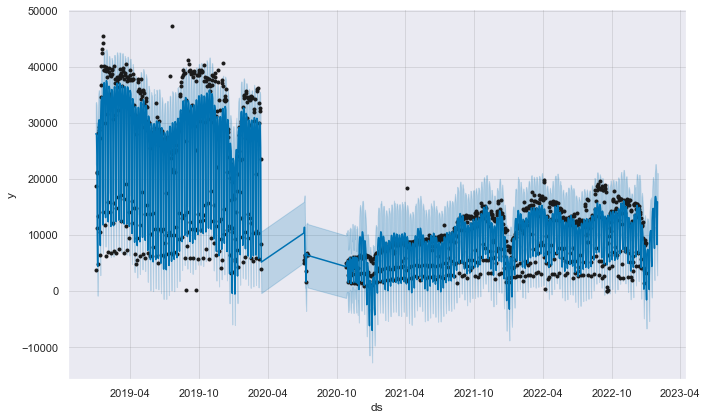

In [174]:
import pandas as pd
from prophet import Prophet

# Combine the 2019 and 2021 datasets
data = pd.concat([data2019,data2020, data2021_completa, data2022])

# Aggregate ridership by date
daily_totals = data.groupby(['OPERATIVE_DATE', 'Year']).agg({'ENTRIES': 'sum', 'EXITS': 'sum'}).reset_index()
daily_totals['TOTAL'] = daily_totals['ENTRIES'] + daily_totals['EXITS']
daily_totals = daily_totals.groupby('OPERATIVE_DATE')['TOTAL'].sum().reset_index()

# Prepare the data for the Prophet model
prophet_data = daily_totals.rename(columns={'OPERATIVE_DATE': 'ds', 'TOTAL': 'y'})

lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-11-27'},
])

for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days


prophet_data['pre_covid'] = pd.to_datetime(prophet_data['ds']) < pd.to_datetime('2020-03-21')
prophet_data['post_covid'] = ~prophet_data['pre_covid']

# Fit the model
# Fit the model
model = Prophet(
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=False,  # Enable weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays=lockdowns,
    changepoint_prior_scale=1.0
)

# Python
model.add_seasonality(
    name='weekly_pre_covid',
    period=7,
    fourier_order=3,
    condition_name='pre_covid',
)
model.add_seasonality(
    name='weekly_post_covid',
    period=7,
    fourier_order=3,
    condition_name='post_covid',
);

# Fit the model with your data
model.fit(prophet_data)

# Make predictions for the next 4 weeks (30 days approximately)
future = model.make_future_dataframe(periods=30)
future['pre_covid'] = pd.to_datetime(future['ds']) < pd.to_datetime('2020-03-21')
future['post_covid'] = ~future['pre_covid']
forecast = model.predict(future)

# Plot the predictions
fig = model.plot(forecast)
plt.show()

# gráfica con y sin el modelo
# 

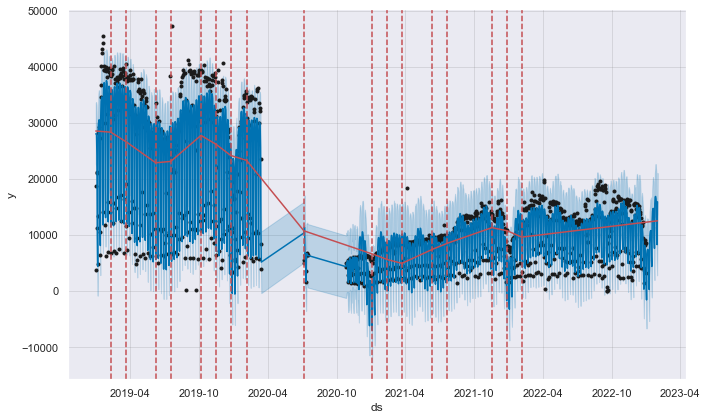

In [204]:
# Python 
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
# Separate weekdays, weekend and/or sunday/saturday

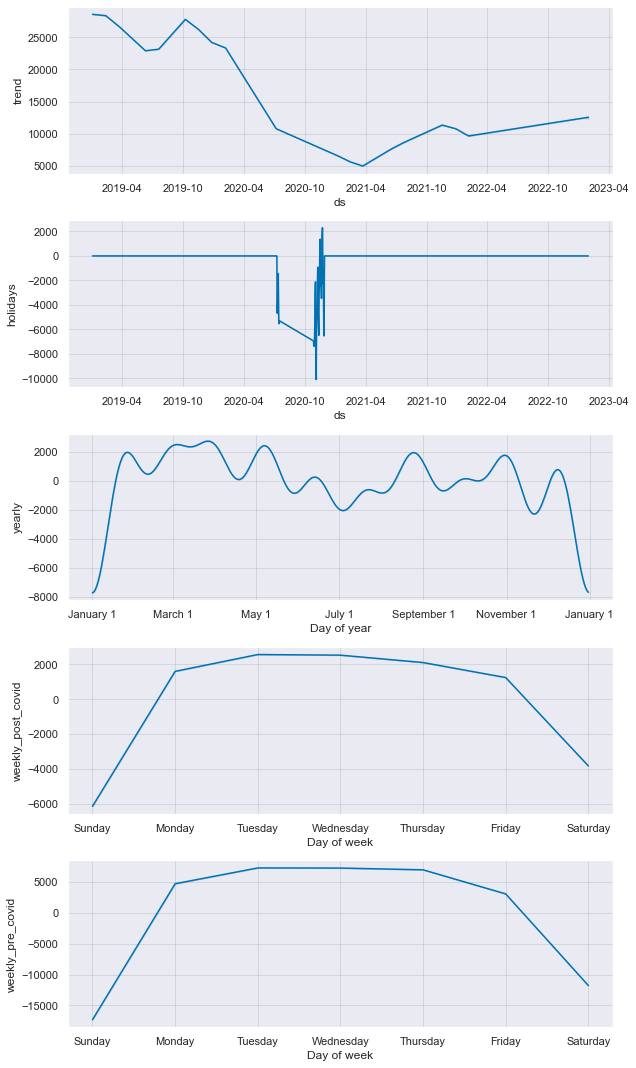

Percentage of Recovery: 70.78802846094878%


In [175]:
# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

# Aggregate ridership by date, considering only 'ENTRIES'
daily_entries = data.groupby(['OPERATIVE_DATE', 'Year'])['ENTRIES'].sum().reset_index()

# Resample the data to get average entries per week
daily_entries['OPERATIVE_DATE'] = pd.to_datetime(daily_entries['OPERATIVE_DATE'])
weekly_entries = daily_entries.resample('W', on='OPERATIVE_DATE').mean().reset_index()

# Prepare the data for the Prophet model
weekly_entries = weekly_entries.rename(columns={'OPERATIVE_DATE': 'ds', 'ENTRIES': 'y'})


# Make sure your dates are recognized as datetime objects
weekly_entries['ds'] = pd.to_datetime(weekly_entries['ds'])

# Calculate the average of weekly entries before COVID-19 closures (before March 2020)
pre_covid_avg = weekly_entries[weekly_entries['ds'] < '2019-10-01']['y'].mean()

# Calculate the average predicted weekly entries for a specific month (e.g., February 2023)
predicted_avg = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] < '2023-02-01')]['yhat'].mean()

# Calculate the recovery percentage
recovery_percentage = (predicted_avg / pre_covid_avg) * 100
print(f"Percentage of Recovery: {recovery_percentage}%")


# tendencia de aumento, ritmo de entrada luego de apertura
# cuanto tiempo pasará para que el sistema vuelva a lo que había antes de la pandemia 
# correlación, análisis descriptivo 

14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing


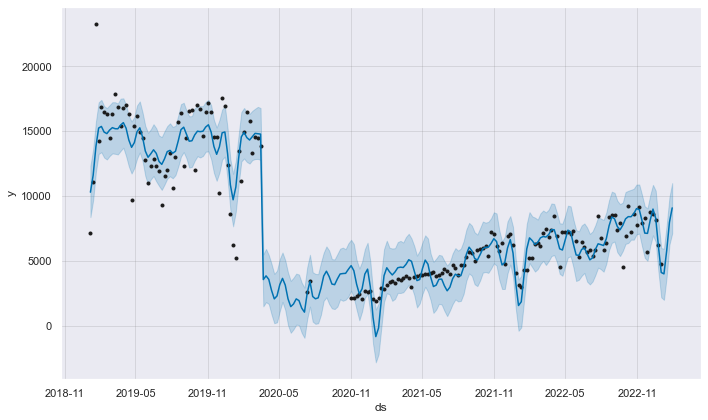

In [162]:
import pandas as pd
from prophet import Prophet

# Combine the 2019, 2021 and 2022 datasets
data = pd.concat([data2019, data2020, data2021_completa, data2022])

# Aggregate ridership by date, considering only 'ENTRIES'
daily_entries = data.groupby(['OPERATIVE_DATE', 'Year'])['ENTRIES'].sum().reset_index()

# Resample the data to get average entries per week
daily_entries['OPERATIVE_DATE'] = pd.to_datetime(daily_entries['OPERATIVE_DATE'])
weekly_entries = daily_entries.resample('W', on='OPERATIVE_DATE').mean().reset_index()

# Prepare the data for the Prophet model
prophet_data = weekly_entries.rename(columns={'OPERATIVE_DATE': 'ds', 'ENTRIES': 'y'})
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
])

for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days


prophet_data['pre_covid'] = pd.to_datetime(prophet_data['ds']) < pd.to_datetime('2020-03-21')
prophet_data['post_covid'] = ~prophet_data['pre_covid']

# Fit the model
model = Prophet(
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=False,  # Enable weekly seasonality
    daily_seasonality=True,  # Disable daily seasonality
    holidays=lockdowns
)

# Python
model.add_seasonality(
    name='weekly_pre_covid',
    period=7,
    fourier_order=3,
    condition_name='pre_covid',
)
model.add_seasonality(
    name='weekly_post_covid',
    period=7,
    fourier_order=3,
    condition_name='post_covid',
);

# Fit the model with your data
model.fit(prophet_data)

# Make predictions for the next 4 weeks (30 days approximately)
future = model.make_future_dataframe(periods=4, freq='W')
future['pre_covid'] = pd.to_datetime(future['ds']) < pd.to_datetime('2020-03-21')
future['post_covid'] = ~future['pre_covid']
forecast = model.predict(future)

# Plot the predictions
fig = model.plot(forecast)
plt.show()


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/42 [00:00<?, ?it/s]

13:38:35 - cmdstanpy - INFO - Chain [1] start processing
13:38:37 - cmdstanpy - INFO - Chain [1] done processing
13:38:37 - cmdstanpy - INFO - Chain [1] start processing
13:38:38 - cmdstanpy - INFO - Chain [1] done processing
13:38:38 - cmdstanpy - INFO - Chain [1] start processing
13:38:39 - cmdstanpy - INFO - Chain [1] done processing
13:38:39 - cmdstanpy - INFO - Chain [1] start processing
13:38:40 - cmdstanpy - INFO - Chain [1] done processing
13:38:40 - cmdstanpy - INFO - Chain [1] start processing
13:38:41 - cmdstanpy - INFO - Chain [1] done processing
13:38:41 - cmdstanpy - INFO - Chain [1] start processing
13:38:42 - cmdstanpy - INFO - Chain [1] done processing
13:38:43 - cmdstanpy - INFO - Chain [1] start processing
13:38:44 - cmdstanpy - INFO - Chain [1] done processing
13:38:44 - cmdstanpy - INFO - Chain [1] start processing
13:38:45 - cmdstanpy - INFO - Chain [1] done processing
13:38:46 - cmdstanpy - INFO - Chain [1] start processing
13:38:47 - cmdstanpy - INFO - Chain [1]

   horizon           mse           rmse           mae      mape     mdape  \
0  10 days  1.591618e+09   39895.090967  16423.523978  1.392468  0.317077   
1  11 days  1.921252e+09   43832.084354  18629.941042  1.574117  0.421585   
2  12 days  5.068045e+09   71190.205138  28149.718213  2.179245  0.433471   
3  13 days  5.729500e+09   75693.463528  31448.927781  2.472697  0.483673   
4  14 days  5.594164e+09   74794.145050  30098.466616  2.397259  0.483673   
..     ...           ...            ...           ...       ...       ...   
76 86 days  2.801994e+10  167391.581521  66479.846893  4.991091  0.975635   
77 87 days  2.512798e+10  158518.077229  61578.287665  4.687440  0.975635   
78 88 days  2.308338e+10  151932.158580  58000.388535  4.402021  0.975635   
79 89 days  2.506695e+10  158325.451446  64653.245844  4.762916  0.975635   
80 90 days  1.721507e+10  131206.207113  52674.375829  3.993130  0.955322   

       smape  coverage  
0   0.751910  0.524823  
1   0.766900  0.526596  


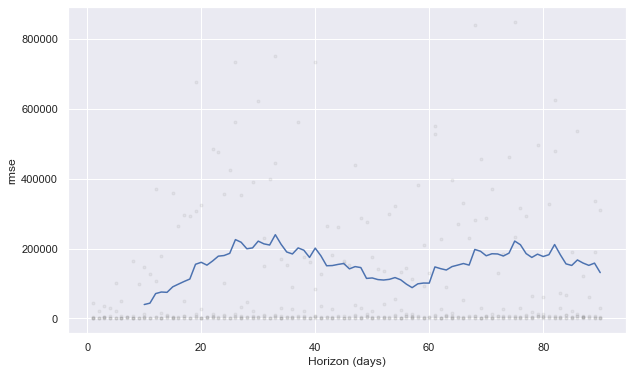

In [139]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Perform cross-validation by simulating historical forecasts
# Here, 'initial' is the training period, 'period' is the spacing between cutoff dates and 'horizon' is the forecast horizon
# You can adjust these parameters as per your dataset
cv_results = cross_validation(model, initial='30 days', period='30 days', horizon='90 days')

# Compute performance metrics
metrics = performance_metrics(cv_results)

# Print the metrics
print(metrics)

# Plotting the performance metrics, for example, RMSE (Root Mean Squared Error)
fig = plot_cross_validation_metric(cv_results, metric='rmse')
plt.show()


## GeoSpatial Analysis

In [18]:
import geopandas as gpd  
from shapely.geometry import Point


/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [19]:
# Read the shapefile
gdf = gpd.GeoDataFrame.from_file("tl_2017_72_tabblock10.shp")

# Print the first few rows of the GeoDataFrame
gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,72,093,960100,3000,720939601003000,Block 3000,G5040,R,NaN,NaN,S,9463221,227,+18.1593880,-066.9807879,"POLYGON ((-66.99534 18.15631, -66.99517 18.157..."
1,72,115,330400,2045,721153304002045,Block 2045,G5040,R,NaN,NaN,S,703030,157,+18.3829115,-066.9058646,"POLYGON ((-66.91053 18.38839, -66.91021 18.388..."
2,72,043,954600,1014,720439546001014,Block 1014,G5040,R,NaN,NaN,S,1384725,134,+18.0578894,-066.3625387,"POLYGON ((-66.36904 18.06137, -66.36903 18.061..."
3,72,145,560201,1004,721455602011004,Block 1004,G5040,R,NaN,NaN,S,0,88041,+18.4944661,-066.4143344,"POLYGON ((-66.41649 18.49362, -66.41618 18.495..."
4,72,049,990501,0015,720499905010015,Block 0015,G5040,R,NaN,NaN,S,0,234982,+18.2910431,-065.2718379,"POLYGON ((-65.27557 18.29227, -65.26887 18.292..."


In [12]:
income = pd.read_excel("income.xlsx", skiprows=1)

In [13]:
income.head()

,num_geo,Estimate!!Total:,"Estimate!!Total:!!Less than $10,000","Estimate!!Total:!!$10,000 to $14,999","Estimate!!Total:!!$15,000 to $19,999","Estimate!!Total:!!$20,000 to $24,999","Estimate!!Total:!!$25,000 to $29,999","Estimate!!Total:!!$30,000 to $34,999","Estimate!!Total:!!$35,000 to $39,999","Estimate!!Total:!!$40,000 to $44,999","Estimate!!Total:!!$45,000 to $49,999","Estimate!!Total:!!$50,000 to $59,999","Estimate!!Total:!!$60,000 to $74,999","Estimate!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more",id,Geographic Area Name
0,720019563001,601,216,78,52,93,49,14,60,16,12,0,0,11,0,0,0,0,1500000US720019563001,"Block Group 1, Census Tract 9563, Adjuntas Mun..."
1,720019563002,712,254,90,41,36,61,48,25,26,17,22,52,0,40,0,0,0,1500000US720019563002,"Block Group 2, Census Tract 9563, Adjuntas Mun..."
2,720019564001,524,157,92,92,47,0,48,27,32,0,0,29,0,0,0,0,0,1500000US720019564001,"Block Group 1, Census Tract 9564, Adjuntas Mun..."
3,720019564002,367,136,90,0,24,12,0,0,43,34,0,14,14,0,0,0,0,1500000US720019564002,"Block Group 2, Census Tract 9564, Adjuntas Mun..."
4,720019565001,484,236,27,64,52,42,16,9,15,13,10,0,0,0,0,0,0,1500000US720019565001,"Block Group 1, Census Tract 9565, Adjuntas Mun..."


In [39]:
cupey_point = Point(-66.048812870, 18.347326280)



In [40]:
cupey_gdf = gpd.GeoDataFrame(geometry=[cupey_point], crs=gdf.crs)

In [41]:
buffer_distance = 0.10   # Distancia en metros
buffer_geometry = cupey_gdf.geometry.buffer(buffer_distance)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer_geometry, crs=gdf.crs)

/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [42]:
intersection = gpd.overlay(gdf, buffer_gdf, how='intersection')


/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


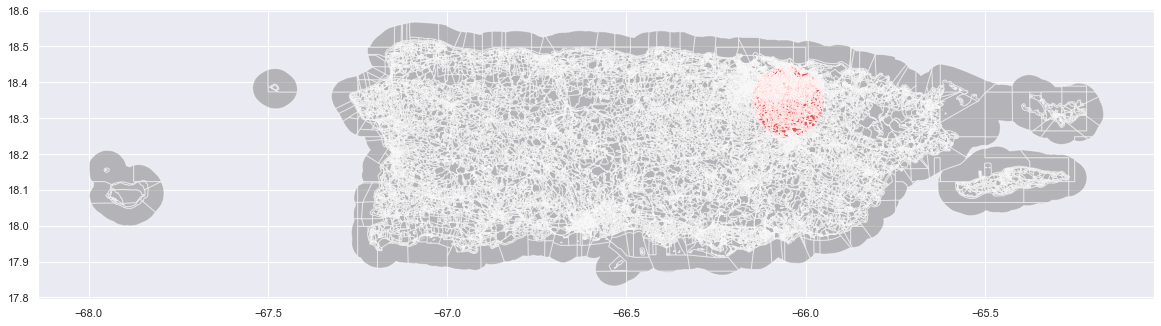

In [11]:

# Display the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='gray', alpha=0.5)  # Plot Puerto Rico shapefile
intersection.plot(ax=ax, color='red', alpha=0.5)  # Plot intersection
ax.set_aspect('equal')  # Set equal aspect ratio
plt.show()

/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


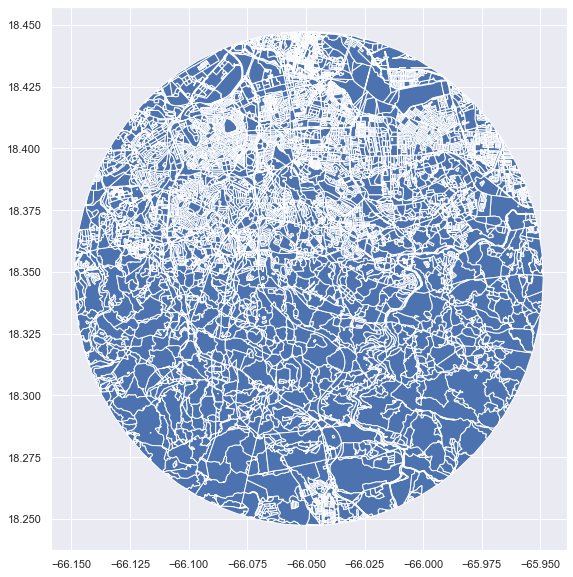

In [12]:
intersection.plot()
plt.show()

## Por estaciones 

In [189]:
estacion_bayamon = Point(-66.153611, 18.400000)
sagrado = Point(-66.060278, 18.436111)
universidad = Point(-66.051667, 18.404722)
cupey = Point(-66.060278, 18.436111)
hato_rey = Point(-66.060000, 18.429167)
roosevelt = Point(-66.058611, 18.423056)
domenech = Point(-66.056389, 18.415278)
pinero = Point(-66.055278, 18.410278)

In [207]:
bayamon_gdf = gpd.GeoDataFrame(geometry=[estacion_bayamon], crs=gdf.crs)
universidad_gdf = gpd.GeoDataFrame(geometry=[universidad], crs=gdf.crs)
cupey_gdf = gpd.GeoDataFrame(geometry=[cupey], crs=gdf.crs)
hato_rey_gdf = gpd.GeoDataFrame(geometry=[hato_rey], crs=gdf.crs)
roosevelt_gdf = gpd.GeoDataFrame(geometry=[roosevelt], crs=gdf.crs)
domenech_gdf = gpd.GeoDataFrame(geometry=[domenech], crs=gdf.crs)
pinero_gdf = gpd.GeoDataFrame(geometry=[pinero], crs=gdf.crs)
sagrado_gdf = gpd.GeoDataFrame(geometry=[sagrado], crs=gdf.crs)



In [208]:
buffer_distance = 0.008   # Distancia en metros
buffer_geometry = bayamon_gdf.geometry.buffer(buffer_distance)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer_geometry, crs=gdf.crs)

/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [209]:
bayamon_buffer = gpd.overlay(gdf, buffer_gdf, how='intersection')

In [210]:
buffer_geometry = universidad_gdf.geometry.buffer(buffer_distance)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer_geometry, crs=gdf.crs)

/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [211]:
universidad_buffer = gpd.overlay(gdf, buffer_gdf, how='intersection')

In [212]:
buffer_geometry = roosevelt_gdf.geometry.buffer(buffer_distance)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer_geometry, crs=gdf.crs)

/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [213]:
roosevelt_buffer = gpd.overlay(gdf, buffer_gdf, how='intersection')

In [214]:
buffer_geometry = sagrado_gdf.geometry.buffer(buffer_distance)
buffer_gdf = gpd.GeoDataFrame(geometry=buffer_geometry, crs=gdf.crs)

/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [215]:
sagrado_buffer = gpd.overlay(gdf, buffer_gdf, how='intersection')

/Users/adel/PycharmProjects/NICR/venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


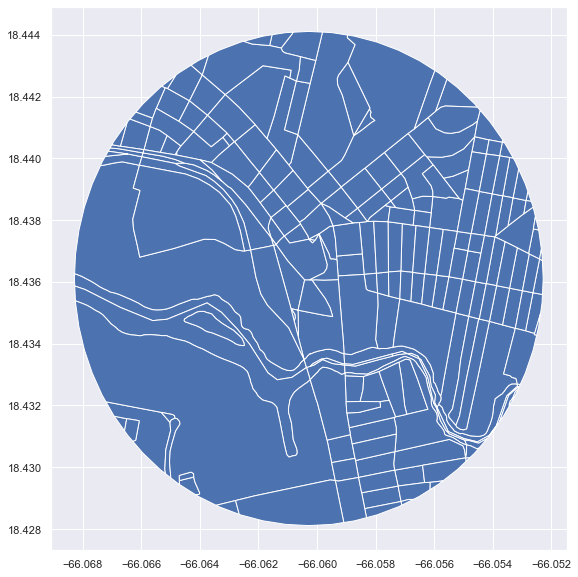

In [216]:
sagrado_buffer.plot()
plt.show()

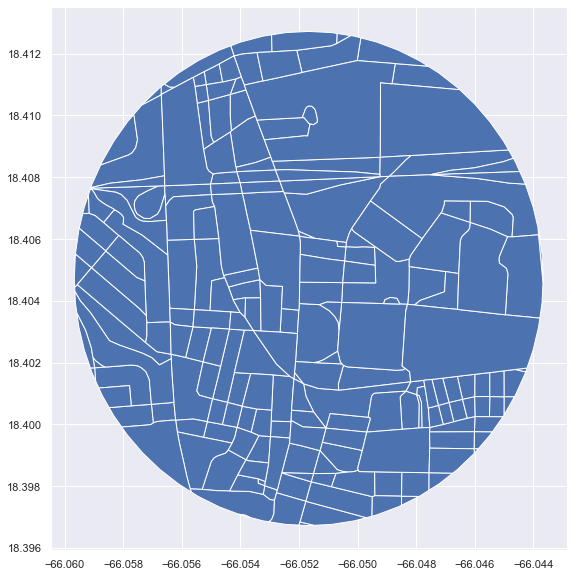

In [85]:
universidad_buffer.plot()
plt.show()

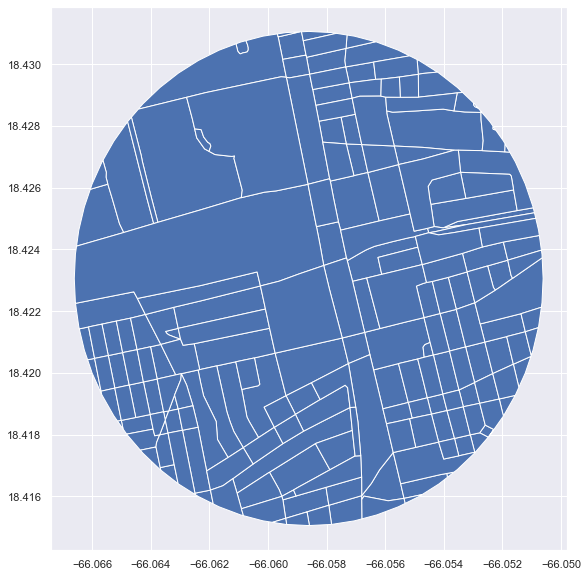

In [117]:
roosevelt_buffer.plot()
plt.show()

In [15]:
income["GEOID10"] = income["num_geo"]

In [217]:
bayamon_buffer["GEOID10"] = [int(str(code)[:-3]) for code in bayamon_buffer.GEOID10.values]
roosevelt_buffer["GEOID10"] = [int(str(code)[:-3]) for code in roosevelt_buffer.GEOID10.values]
universidad_buffer["GEOID10"] = [int(str(code)[:-3]) for code in universidad_buffer.GEOID10.values]
sagrado_buffer["GEOID10"] = [int(str(code)[:-3]) for code in sagrado_buffer.GEOID10.values]

In [21]:
gdf["GEOID10"] = gdf.GEOID10.astype(int)

In [218]:
bayamon_demo = bayamon_buffer.merge(income, on="GEOID10", how="inner")
universidad_demo = universidad_buffer.merge(income, on="GEOID10", how="inner")
roosevelt_demo = roosevelt_buffer.merge(income, on="GEOID10", how="inner")
sagrado_demo = sagrado_buffer.merge(income, on="GEOID10", how="inner")

In [219]:
bayamon_demo.tail()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,...,"Estimate!!Total:!!$45,000 to $49,999","Estimate!!Total:!!$50,000 to $59,999","Estimate!!Total:!!$60,000 to $74,999","Estimate!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more",id,Geographic Area Name
165,72,021,031031,2011,720210310312,Block 2011,G5040,U,79093,U,...,24,52,43,26,49,18,8,8,1500000US720210310312,"Block Group 2, Census Tract 310.31, BayamÃ³n M..."
166,72,021,030101,2019,720210301012,Block 2019,G5040,U,79093,U,...,39,19,41,39,0,0,56,38,1500000US720210301012,"Block Group 2, Census Tract 301.01, BayamÃ³n M..."
167,72,021,030101,2020,720210301012,Block 2020,G5040,U,79093,U,...,39,19,41,39,0,0,56,38,1500000US720210301012,"Block Group 2, Census Tract 301.01, BayamÃ³n M..."
168,72,021,031005,1007,720210310051,Block 1007,G5040,U,79093,U,...,16,38,33,0,0,0,0,0,1500000US720210310051,"Block Group 1, Census Tract 310.05, BayamÃ³n M..."
169,72,021,030700,1000,720210307001,Block 1000,G5040,U,79093,U,...,0,53,17,6,0,0,0,0,1500000US720210307001,"Block Group 1, Census Tract 307, BayamÃ³n Muni..."


In [220]:
# bajo/sobre nivel de pobreza atributo 

In [149]:
bayamon_demo["Estimate!!Total:!!Less than $10,000"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.373832989657244

In [105]:
bayamon_demo["Estimate!!Total:!!$10,000 to $14,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.08982123431132183

In [107]:
bayamon_demo["Estimate!!Total:!!$15,000 to $19,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.139456721167741

In [140]:
bayamon_demo["Estimate!!Total:!!$20,000 to $24,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.07447758528308626

In [141]:
bayamon_demo["Estimate!!Total:!!$25,000 to $29,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.032359674617220606

In [142]:
bayamon_demo["Estimate!!Total:!!$30,000 to $34,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.02081540534835766

In [143]:
bayamon_demo["Estimate!!Total:!!$35,000 to $39,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.03200246797317703

In [144]:
bayamon_demo["Estimate!!Total:!!$40,000 to $44,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.03700336098978714

In [145]:
bayamon_demo["Estimate!!Total:!!$45,000 to $49,999"].sum() / bayamon_demo["Estimate!!Total:"].sum() 

0.010277809349072074

In [148]:
universidad_demo["Estimate!!Total:!!Less than $10,000"].sum() / universidad_demo["Estimate!!Total:"].sum() 

0.3320617691783336

In [150]:
universidad_demo["Estimate!!Total:!!$10,000 to $14,999"].sum() / universidad_demo["Estimate!!Total:"].sum() 

0.09688794504745425

In [151]:
universidad_demo["Estimate!!Total:!!$20,000 to $24,999"].sum() / universidad_demo["Estimate!!Total:"].sum() 

0.05940957474699806

In [203]:
sagrado_demo["Estimate!!Total:!!Less than $10,000"].sum() / sagrado_demo["Estimate!!Total:"].sum() 

0.31890120367059943

In [205]:
gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,72,093,960100,3000,720939601003000,Block 3000,G5040,R,NaN,NaN,S,9463221,227,+18.1593880,-066.9807879,"POLYGON ((-66.99534 18.15631, -66.99517 18.157..."
1,72,115,330400,2045,721153304002045,Block 2045,G5040,R,NaN,NaN,S,703030,157,+18.3829115,-066.9058646,"POLYGON ((-66.91053 18.38839, -66.91021 18.388..."
2,72,043,954600,1014,720439546001014,Block 1014,G5040,R,NaN,NaN,S,1384725,134,+18.0578894,-066.3625387,"POLYGON ((-66.36904 18.06137, -66.36903 18.061..."
3,72,145,560201,1004,721455602011004,Block 1004,G5040,R,NaN,NaN,S,0,88041,+18.4944661,-066.4143344,"POLYGON ((-66.41649 18.49362, -66.41618 18.495..."
4,72,049,990501,0015,720499905010015,Block 0015,G5040,R,NaN,NaN,S,0,234982,+18.2910431,-065.2718379,"POLYGON ((-65.27557 18.29227, -65.26887 18.292..."


In [104]:
income.columns

Index(['num_geo', 'Estimate!!Total:', 'Estimate!!Total:!!Less than $10,000',
       'Estimate!!Total:!!$10,000 to $14,999',
       'Estimate!!Total:!!$15,000 to $19,999',
       'Estimate!!Total:!!$20,000 to $24,999',
       'Estimate!!Total:!!$25,000 to $29,999',
       'Estimate!!Total:!!$30,000 to $34,999',
       'Estimate!!Total:!!$35,000 to $39,999',
       'Estimate!!Total:!!$40,000 to $44,999',
       'Estimate!!Total:!!$45,000 to $49,999',
       'Estimate!!Total:!!$50,000 to $59,999',
       'Estimate!!Total:!!$60,000 to $74,999',
       'Estimate!!Total:!!$75,000 to $99,999',
       'Estimate!!Total:!!$100,000 to $124,999',
       'Estimate!!Total:!!$125,000 to $149,999',
       'Estimate!!Total:!!$150,000 to $199,999',
       'Estimate!!Total:!!$200,000 or more', 'id', 'Geographic Area Name',
       'GEOID10'],
      dtype='object')

In [ ]:
# backpoints 
# tendencia 
# negativo 
# tendencia entre años 
# dias de semana, meses, y por hora, 
# buffers 